In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg as AR
from statsmodels.tsa.arima_model import ARMA
# DATASET PARSER!


def parse(year, month, day, hour, minute):
    return year + '-' + month + '-' + day + ' ' + hour + ':' + minute


font = {
    'weight': 'normal',
    'size': 15}

matplotlib.rc('font', **font)
plt.rcParams['figure.figsize'] = [10, 10]

# Data Preparation

First, we need to call the desired information inside each of the datasets. To do this, we are going to use the Pandas library. Below, you can see the header of the data for 2010.

In [2]:
twenty10 = pd.read_csv('2010.csv', header=0, parse_dates={
                       'Date/Time': ['Year', 'Month', 'Day', 'Hour', 'Minute']}, date_parser=parse, index_col=0)

twenty10.drop(['Fill Flag', 'Surface Albedo', 'Wind Speed', 'Relative Humidity',
               'Temperature', 'Pressure', 'Unnamed: 20'], axis=1, inplace=True)
twenty10.head()

,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle
Date/Time,,,,,,,,,
2010-01-01 00:00:00,0,0,0,0,0,0,4,-4,92.79
2010-01-01 00:30:00,0,0,0,0,0,0,0,-4,98.49
2010-01-01 01:00:00,0,0,0,0,0,0,0,-4,104.35
2010-01-01 01:30:00,0,0,0,0,0,0,0,-4,110.33
2010-01-01 02:00:00,0,0,0,0,0,0,0,-4,116.41


Then, we used a for loop in order to call and concatenate every new dataset. Variable new is going to have the information of the year, and we are going to add, at the end of each year, the new year information. Next, is the implementation of such code.

In [3]:
add = twenty10
for i in range(1, 10):
    new = pd.read_csv('201'+str(i)+'.csv', header=0, parse_dates={
        'Date/Time': ['Year', 'Month', 'Day', 'Hour', 'Minute']}, date_parser=parse, index_col=0)
    new.drop(['Fill Flag', 'Surface Albedo', 'Wind Speed', 'Relative Humidity',
              'Temperature', 'Pressure'], axis=1, inplace=True)
    add = [add, new]
    add = pd.concat(add)
df = add.copy(deep=True)

We can see the head of the dataframe df:

In [4]:
df.head(10)

,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle
Date/Time,,,,,,,,,
2010-01-01 00:00:00,0,0,0,0,0,0,4,-4.0,92.79
2010-01-01 00:30:00,0,0,0,0,0,0,0,-4.0,98.49
2010-01-01 01:00:00,0,0,0,0,0,0,0,-4.0,104.35
2010-01-01 01:30:00,0,0,0,0,0,0,0,-4.0,110.33
2010-01-01 02:00:00,0,0,0,0,0,0,0,-4.0,116.41
2010-01-01 02:30:00,0,0,0,0,0,0,0,-4.0,122.57
2010-01-01 03:00:00,0,0,0,0,0,0,0,-4.0,128.78
2010-01-01 03:30:00,0,0,0,0,0,0,0,-4.0,135.02
2010-01-01 04:00:00,0,0,0,0,0,0,0,-4.0,141.26


And the tail of the dataframe df

In [5]:
df.tail(10)

,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle
Date/Time,,,,,,,,,
2019-12-31 19:00:00,58,986,599,58,986,599,0,-8.8,56.70
2019-12-31 19:30:00,57,986,588,57,986,588,0,-8.8,57.44
2019-12-31 20:00:00,62,954,553,56,975,558,0,-8.5,59.03
2019-12-31 20:30:00,54,960,513,54,960,513,0,-8.5,61.42
2019-12-31 21:00:00,50,937,453,50,937,453,0,-8.2,64.51
2019-12-31 21:30:00,48,900,382,48,900,382,0,-8.2,68.20
2019-12-31 22:00:00,44,847,300,44,847,300,0,-7.0,72.40
2019-12-31 22:30:00,40,712,200,38,765,210,0,-7.0,77.02
2019-12-31 23:00:00,31,630,119,31,630,119,0,-4.8,81.97


Finally, we can see how is the behavior of a plot of the dataframe, seeing all the years:

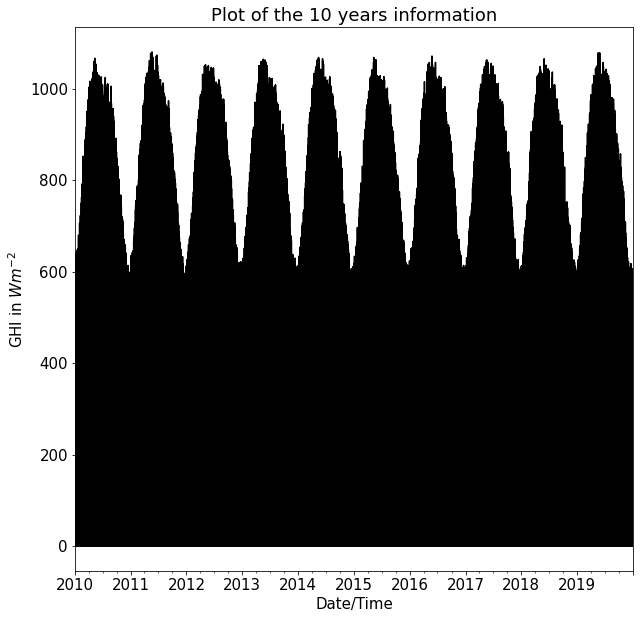

In [6]:
df['GHI'].plot(color='k')
plt.ylabel('GHI in $W m^{-2}$')
plt.title('Plot of the 10 years information')
plt.show()

# Data Visualization

## A Year

We only need to pass some information to the parsed DataFrame object, the GHI over a year. 

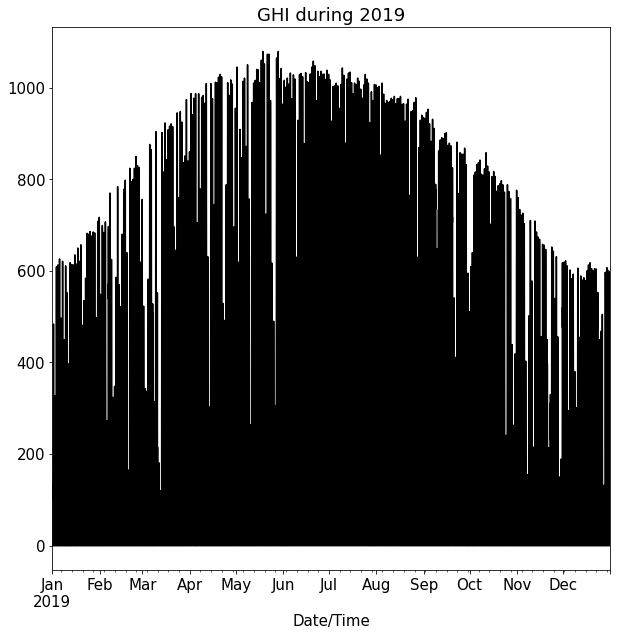

In [7]:
year = 2019
df[str(year)]['GHI'].plot(color='k')
plt.title('GHI during ' + str(year))
plt.show()

## A Month

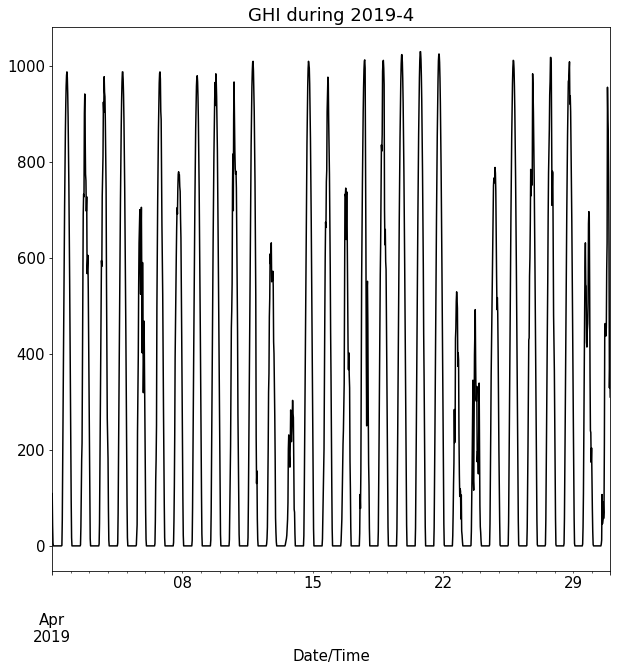

In [8]:
year = 2019
month = 4
df[str(year)+'-'+str(month)]['GHI'].plot(color='k')
plt.title('GHI during ' + str(year)+'-'+str(month))
plt.show()

## A Day

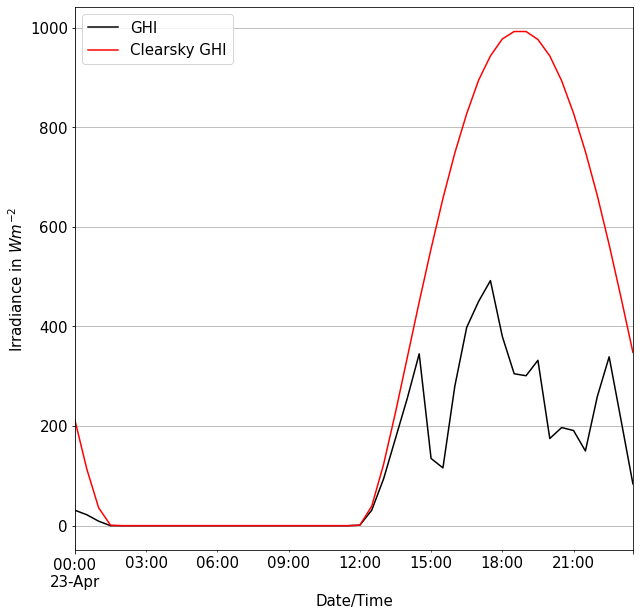

In [9]:
year = 2019
month = 4
day = 23
df[str(year)+'-'+str(month)+'-'+str(day)]['GHI'].plot(color='k')
df[str(year)+'-'+str(month)+'-'+str(day)]['Clearsky GHI'].plot(color='r')
#plt.title('GHI during ' + str(year)+'-'+str(month)+'-'+str(day))
plt.grid()
plt.legend()
plt.ylabel('Irradiance in $Wm^{-2}$')

plt.show()

# Model Deployment

To do this, we need to previously take the Train-Test Split. To this particular project, we are going to use the last year to model. The first 10 months to train, and the last two months to test the model. 

## Train-Test Split

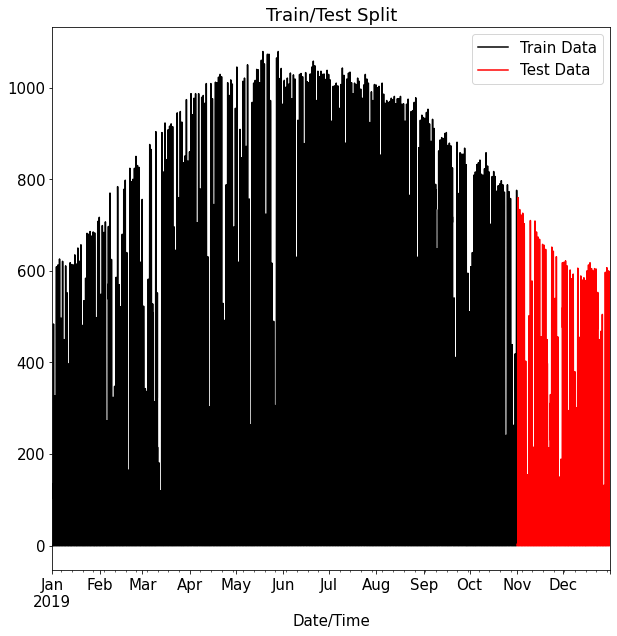

In [10]:
data = df['2019']['GHI'].copy(deep=True)
DataCount = data.count() - data['2019-12'].count() - data['2019-11'].count()
xtrain = data.iloc[:DataCount]
xtest = data.iloc[DataCount:]
xtrain.plot(color='k', label='Train Data')
xtest.plot(color='r', label='Test Data')
plt.legend()
plt.title('Train/Test Split')
plt.show()

## Naive Forecast

In [11]:
def model_persistence(x):
    return x

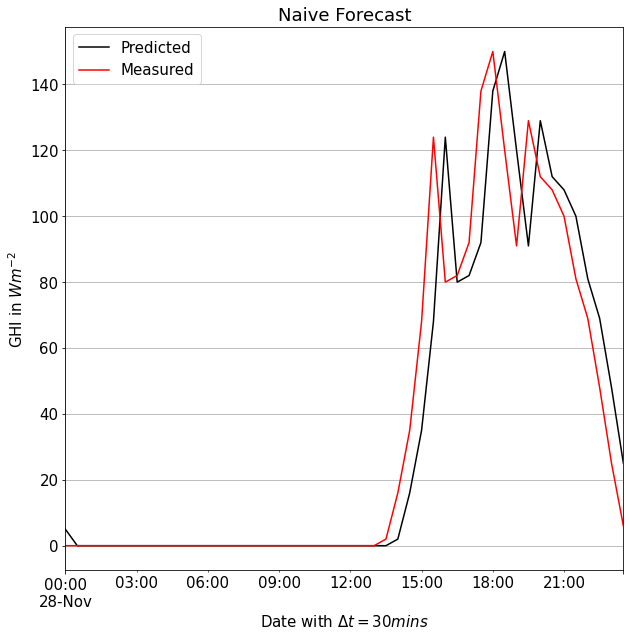

In [12]:
data = df['2019']['GHI'].copy(deep=True)
naive = pd.concat([data.shift(1), data], axis=1)
naive.columns = ['t', 't+30mins']
naive['2019-11-28']['t'].plot(grid=True, color='k', label='Predicted')
naive['2019-11-28']['t+30mins'].plot(grid=True, color='r', label='Measured')
plt.ylabel('GHI in $W m^{-2}$', fontsize=15)
plt.xlabel('Date with $\Delta t = 30 mins$', fontsize=15)
plt.title('Naive Forecast')
plt.legend()
plt.show()

In [13]:
naive.tail()

,t,t+30mins
Date/Time,,
2019-12-31 21:30:00,453.0,382
2019-12-31 22:00:00,382.0,300
2019-12-31 22:30:00,300.0,200
2019-12-31 23:00:00,200.0,119
2019-12-31 23:30:00,119.0,38


In [14]:
X = naive.values
lengthyear = len(X)
train, test = X[1:DataCount], X[DataCount:]
xtrain, ytrain = train[:, 0], train[:, 1]
xtest, ytest = test[:, 0], test[:, 1]
predictions = list()
for x in xtest:
    yhat = model_persistence(x)
    predictions.append(yhat)
rmse_per = np.sqrt(mean_squared_error(ytest, predictions))
print('RMSE: %.4f' % rmse_per)

RMSE: 43.8681


## Modified Persistence Model

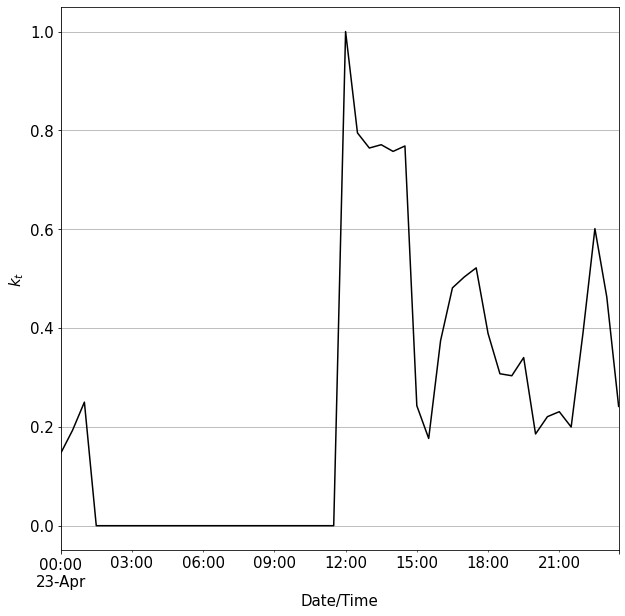

In [15]:
k_data = pd.DataFrame(df['GHI']/df['Clearsky GHI'])
k_data = k_data.fillna(0)
naive2 = pd.concat([df['Clearsky GHI'], k_data], axis=1)
naive2.columns = ['Clearsky GHI', 'k']
naive2['2019-4-23']['k'].plot(color='k', grid=True)
#plt.title('Clearsky Index during December 2019')
plt.ylabel('$k_t$')
plt.show()

In [16]:
dataset2 = pd.concat([naive2['k'].shift(1), naive2['Clearsky GHI']], axis=1)
dataset2.drop(dataset2.index[0], inplace=True)
dataset2.columns = ['k', 't+1']
dataset2

,k,t+1
Date/Time,,
2010-01-01 00:30:00,0.000000,0
2010-01-01 01:00:00,0.000000,0
2010-01-01 01:30:00,0.000000,0
2010-01-01 02:00:00,0.000000,0
2010-01-01 02:30:00,0.000000,0
...,...,...
2019-12-31 21:30:00,1.000000,382
2019-12-31 22:00:00,1.000000,300
2019-12-31 22:30:00,1.000000,210


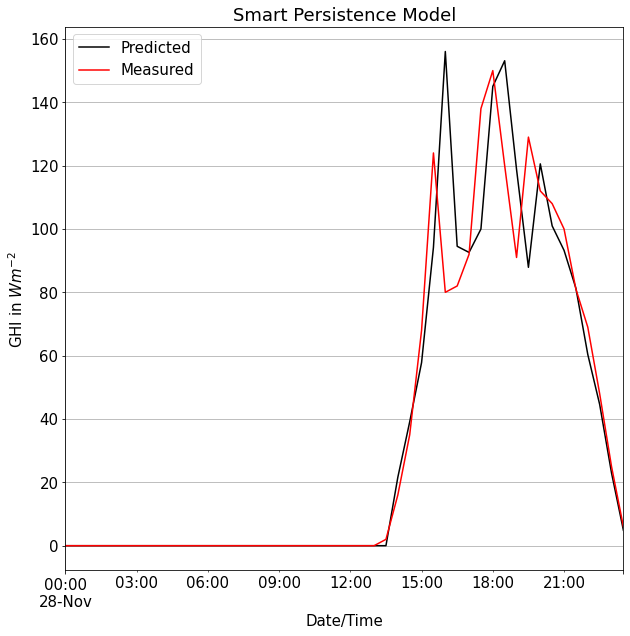

In [17]:
Itp1 = pd.DataFrame(dataset2['k']*dataset2['t+1'])
Itp1.columns = ['Predicted']
Itp1['2019-11-28'].plot(color='k')
df['2019-11-28']['GHI'].plot(label='Measured', color='r')
plt.legend()
plt.grid()
plt.ylabel('GHI in $Wm^{-2}$')
plt.title('Smart Persistence Model')
plt.show()

In [18]:
measured = df['2019']['GHI'].copy(deep=True)
predicted = Itp1['2019'].copy(deep=True)
trainsize = DataCount
xtrain, ytest = measured.values[:trainsize], measured.values[trainsize:]
yhat = predicted.values[trainsize:]

In [19]:
rmse_per2 = np.sqrt(mean_squared_error(ytest, yhat))
print('RMSE: %.4f' % rmse_per2)

RMSE: 23.0018


## Autoregression (AR) Model

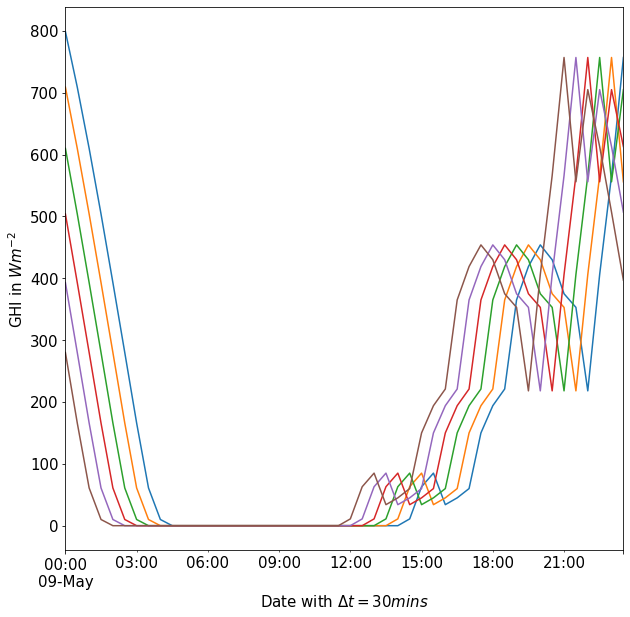

In [20]:
dataAR = df['2019']['GHI'].copy(deep=True)
dataAR = pd.DataFrame(dataAR)
dataAR = pd.concat([dataAR.shift(5), dataAR.shift(4), dataAR.shift(
    3), dataAR.shift(2), dataAR.shift(1), dataAR], axis=1)
dataAR.columns = [['t-4', 't-3', 't-2', 't-1', 't', 't+1']]
dataAR.drop(dataAR.index[range(0, 6)], inplace=True)
dataAR['2019-05-9'].plot(legend=False)
plt.ylabel('GHI in $W m^{-2}$')
plt.xlabel('Date with $\Delta t = 30 mins$')
plt.show()

In [21]:
xtrain = dataAR.iloc[:DataCount]
xtest = dataAR.iloc[DataCount:]
ytrain = xtrain[['t+1']]
ytest = xtest[['t+1']]
xtrain.drop('t+1', axis=1, inplace=True)
xtest.drop('t+1', axis=1, inplace=True)
xtest = sm.add_constant(xtest)
xtrain = sm.add_constant(xtrain)
model = sm.OLS(ytrain, xtrain).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    t+1   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.547e+05
Date:                Tue, 08 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:31:17   Log-Likelihood:                -76012.
No. Observations:               14592   AIC:                         1.520e+05
Df Residuals:                   14586   BIC:                         1.521e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1180      0.476     25.479      0.0

/home/cesar/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/home/cesar/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
yhat = model.predict(xtest)
rmse_adl = np.sqrt(mean_squared_error(ytest, yhat))
print('RMSE: %.4f' % rmse_adl)

RMSE: 29.5635


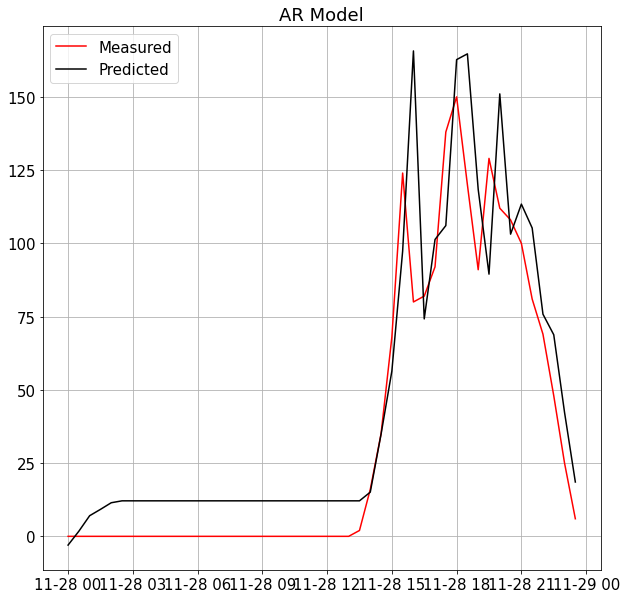

In [23]:
plt.plot(ytest['2019-11-28'], color='r', label='Measured')
plt.plot(yhat['2019-11-28'], color='k', label='Predicted')
plt.legend()
plt.title('AR Model')
plt.grid('major')

Test RMSE: 25.4003


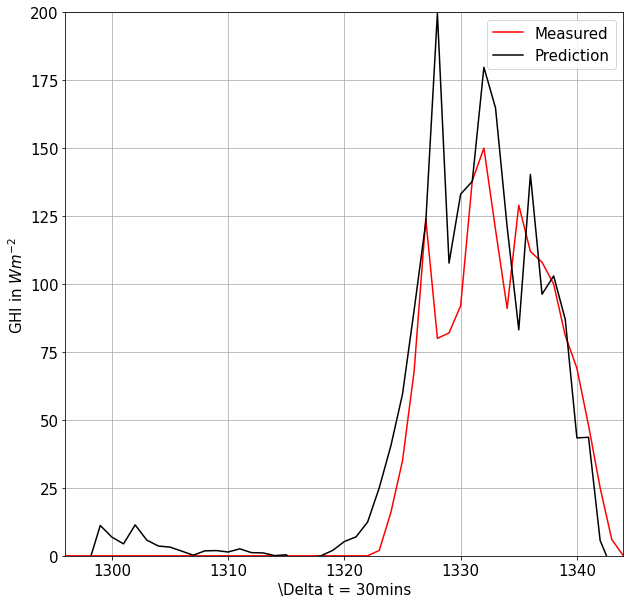

In [24]:
dataAR = df['2019']['GHI'].copy(deep=True)
X = dataAR.values
train, test = X[1:DataCount], X[DataCount:]
window = 48*7
model = AR(train, lags=window)
model_fit = model.fit()
coef = model_fit.params
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictionsAR = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window, length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictionsAR.append(yhat)
    history.append(obs)
    # print('predicted=%f, expected=%f' % (yhat, obs))
rmseAR = np.sqrt(mean_squared_error(test, predictionsAR))
print('Test RMSE: %.4f' % rmseAR)
plt.plot(test, label='Measured', c='r')
plt.plot(predictionsAR, label='Prediction', c='k')
plt.xlabel('\Delta t = 30mins')
plt.ylabel('GHI in $Wm^{-2}$')
plt.grid()
plt.xlim(27*48, 28*48)
plt.ylim(0, 200)
plt.legend()
plt.show()

## MA Model

Test RMSE: 25.3492


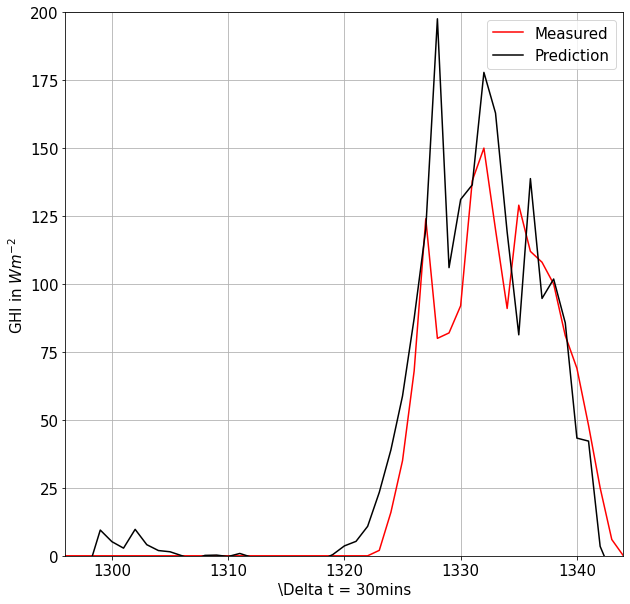

In [25]:
dataARMA = df['2019'][['GHI']].copy(deep=True)
dataARMA = pd.concat([dataARMA.shift(1), dataARMA], axis=1)
dataARMA.columns = ['t', 't+1']
X = dataARMA.values
train, test = X[1:DataCount], X[DataCount:]
xtrain, ytrain = train[:, 0], train[:, 1]
xtest, ytest = test[:, 0], test[:, 1]
train_pred = [x for x in xtrain]
residuals = [ytrain[i]-train_pred[i] for i in range(len(train_pred))]
window = 48*7
model = AR(residuals, lags=window)
model_fit = model.fit()
coef = model_fit.params
history = residuals[len(residuals)-window:]
history = [history[i] for i in range(len(history))]
predictionsMA = list()
expected_error = list()
for t in range(len(ytest)):
    # persistence
    yhat = xtest[t]
    error = ytest[t] - yhat
    expected_error.append(error)
    # predict error
    length = len(history)
    lag = [history[i] for i in range(length-window, length)]
    pred_error = coef[0]
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]
    # correct the prediction
    yhat = yhat + pred_error
    predictionsMA.append(yhat)
    history.append(error)
# error
rmseMA = np.sqrt(mean_squared_error(ytest, predictionsMA))
print('Test RMSE: %.4f' % rmseMA)
plt.plot(ytest, label='Measured', c='r')
plt.plot(predictionsMA, label='Prediction', c='k')
plt.legend()
plt.xlabel('\Delta t = 30mins')
plt.ylabel('GHI in $Wm^{-2}$')
plt.xlim(27*48, 28*48)
plt.ylim(0, 200)
plt.grid()